<a href="https://colab.research.google.com/github/egorik3z/ML/blob/master/ML21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)


# **Задача классификации**

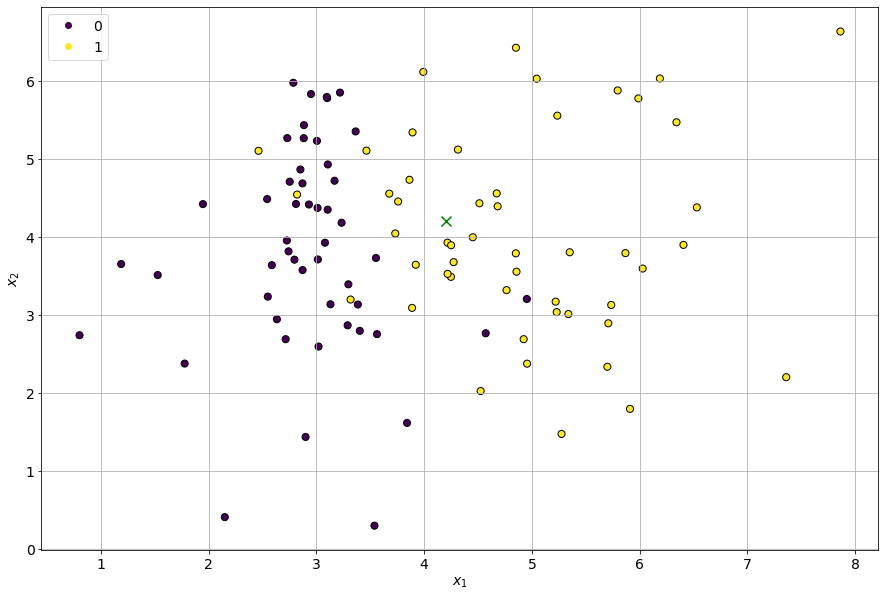

In [7]:
from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=100,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=RANDOM_STATE,
    shift=[4, 4]
)

X_new = np.array([[4.2, 4.2]])

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', s=100, edgecolor='k', c='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [8]:

X_data.shape, y_data.shape

((100, 2), (100,))

In [9]:

X_data[:3]

array([[3.23394531, 4.18332468],
       [3.07961675, 3.9276832 ],
       [3.01341491, 3.71308   ]])

In [10]:
y_data[:3]

array([0, 0, 0])

In [11]:
np.unique(y_data)

array([0, 1])

In [12]:
# Функция сигмоида
def sigmoid(z):
  sgm=1/(1+np.exp(-z))
  return sgm

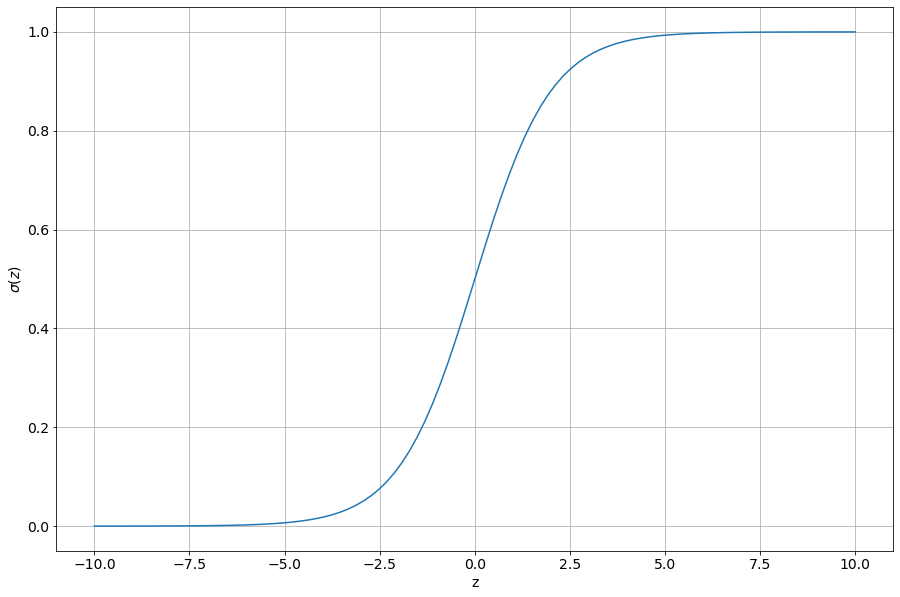

In [13]:
# Проверка функции сигмоид
X = np.linspace(-10, 10, 100)
Y=sigmoid(X)

plt.plot(X, Y)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.grid()

In [14]:
# функция линейной регрессии
def predict_linreg(X, W):
    X=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    z=X@W
    return z

In [15]:
# Проверка
W = np.array([1, 2, 3])
X = np.array([
    [3, 4],
    [2, 3],
    [0, 1]
])
y_true = np.array([19, 14, 4])
y_pred = predict_linreg(X, W)

assert np.all(y_true == y_pred)

In [16]:
# Функция предсказания степени уверенности
def predict_proba(X, W):
    z=predict_linreg(X,W)
    y=sigmoid(z)
    return y

In [17]:
# Проверка
W = np.array([1, 2, 3])
X = np.array([
    [-3, 4],
    [2, -3],
    [0, -1]
])
y_true = np.array([0.999088, 0.01798, 0.1192])
y_pred = predict_proba(X, W)

# Проверка сделана через близость значений из-за округлений
assert np.all(np.abs(y_true-y_pred) < 1e-5)

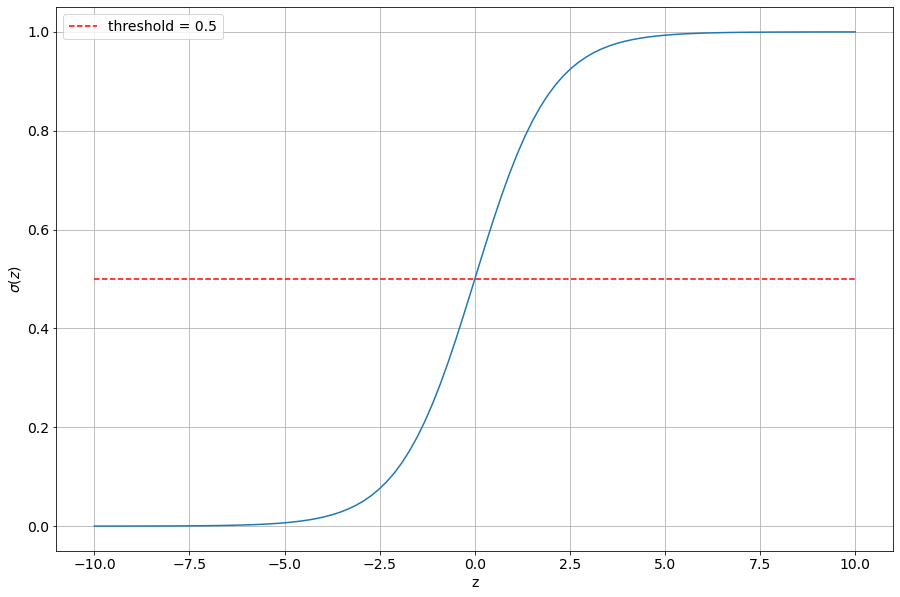

In [18]:
# Предел разделения сигмоиды на 1-да и 0-нет
X = np.linspace(-10, 10, 100)
Y = sigmoid(X)
Y_thrsh = np.full_like(X, 0.5)

plt.plot(X, Y)
plt.plot(X, Y_thrsh, 'r--', label='threshold = 0.5')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.legend()
plt.grid()

In [19]:
# Функция определения класса
def predict(X, W, threshold):
  y_cls=[]
  z=predict_linreg(X,W)
  y=sigmoid(z)
  a=y>threshold
  y_cls=a.astype(int)
  return y_cls

In [20]:
# Проверка функции определения класса
W = np.array([1, 2, 3])
X = np.array([
    [-3, 4],
    [2, -3],
    [0, -1]
])
y_true = np.array([1, 0, 0])
y_pred = predict(X, W, 0.5)
assert np.all(y_true == y_pred)

In [21]:
#Функция визуализации предсказаний
def plot_2d_decision_boundary(X, W, y_true):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = predict_proba(np.c_[xx.ravel(), yy.ravel()], W)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])
    plt.show()

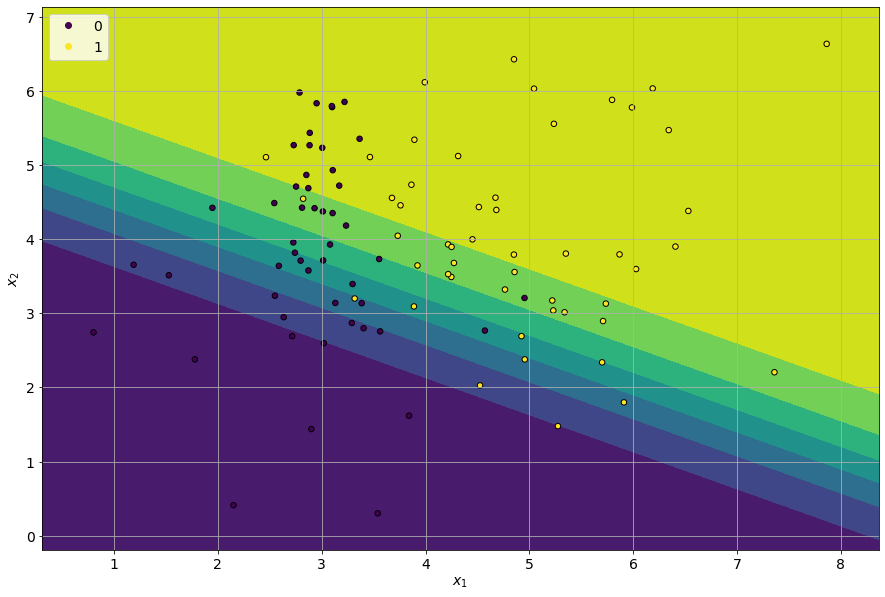

In [22]:
# Выберем случайные веса и установим переменные
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data

plot_2d_decision_boundary(X_data, rand_W, y_data)

In [23]:
#Заменим predict_proba() на predict() 
def plot_2d_decision_boundary1(X, W, y_true):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_vals, x2_vals)

    y_pred = predict(np.c_[xx.ravel(), yy.ravel()], W, 0.5)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])
    plt.show()


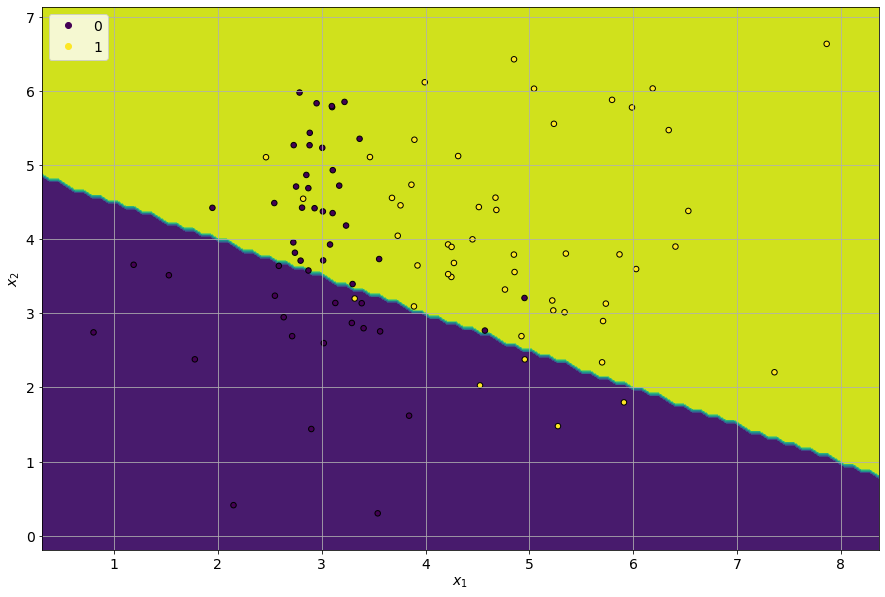

In [24]:

# Выберем случайные веса и установим переменные
rand_W = [-10, 1, 2]
X = X_data
y_true = y_data

plot_2d_decision_boundary1(X_data, rand_W, y_data)

# **Метрики**

In [31]:
# Функция получения показателей
def get_truefalse_metrics(y_true, y_pred):
    TP=np.sum((y_true==1)&(y_pred==1))
    TN=np.sum((y_true==0)&(y_pred==0))
    FP=np.sum((y_true==0)&(y_pred==1))
    FN=np.sum((y_true==1)&(y_pred==0))
    return TP, TN, FP, FN

In [32]:
#Проверка
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
assert np.all([TP == 3, TN == 4, FP == 2, FN == 5])

In [46]:
# Матрица ошибок
def get_confusion_matrix(y_true, y_pred):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    conf_matrix=([TN,FP],[FN,TP])
    return conf_matrix

In [47]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])
conf_matrix = get_confusion_matrix(y_true, y_pred)
assert np.all(conf_matrix == np.array([[4, 2], [5, 3]]))

In [48]:
def show_confusion_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Предсказанное')
    plt.ylabel('Истинное')
    plt.show()

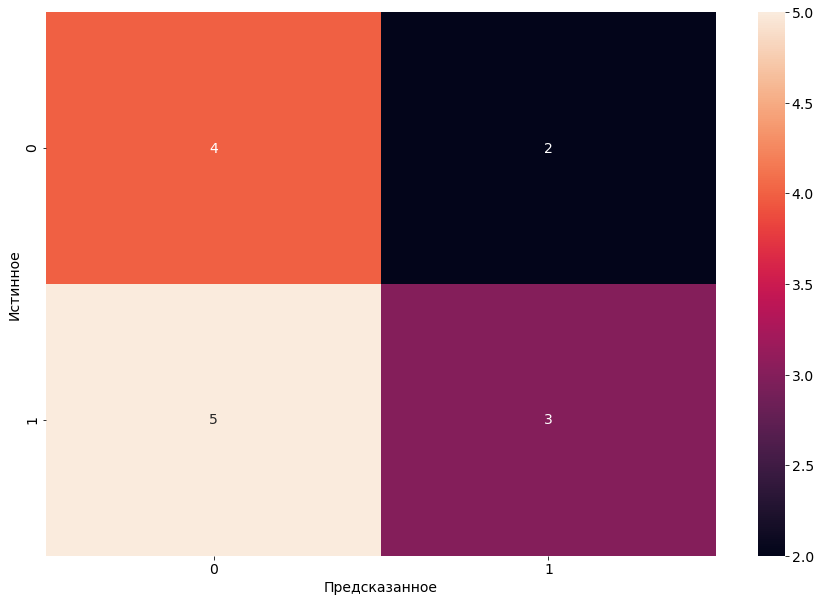

In [49]:
show_confusion_matrix(conf_matrix)


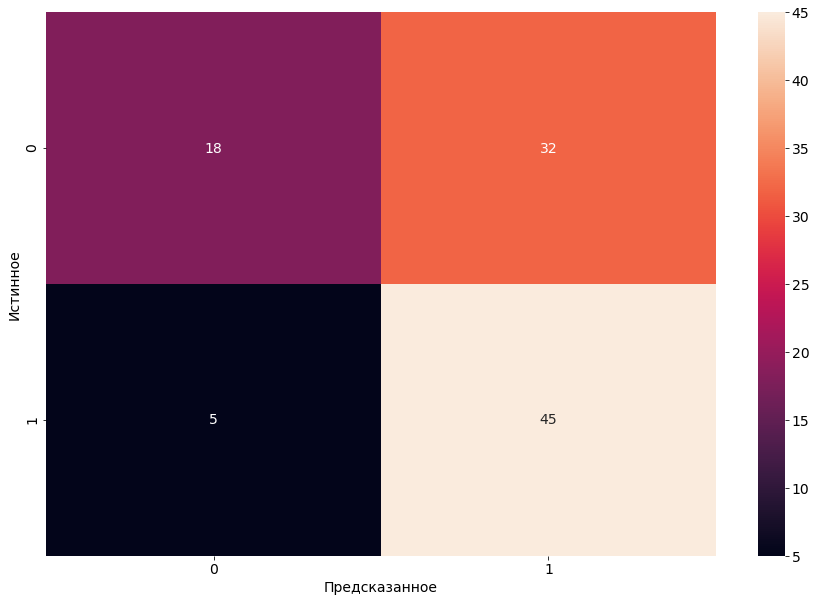

In [58]:
#Задание
# Произведите предсказание классов на данных X_data и отобразите результаты предсказания в виде матрицы ошибок.
# TODO - используйте rand_W для предсказания

rand_W = [-10, 1, 2]
X = X_data
y_true = y_data
y_pred = predict(X, rand_W, 0.5)
conf_matrix=get_confusion_matrix(y_true, y_pred)
show_confusion_matrix(conf_matrix)



In [69]:
#Функция достоверности
def calculate_accuracy(y_true, y_pred):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)
    acc=(TP+TN)/(TP+TN+FP+FN)
    return acc
# Функция точности, полноты и F-мера
def calculate_recall_precision_f1(y_true, y_pred, class_index):
    TP, TN, FP, FN = get_truefalse_metrics(y_true, y_pred)

    '''
    class_index - Индекс класса для которого делается оценка показателей
    '''
    if class_index==1:
      precision=TP/(TP+FP)
      recall=TP/(TP+FN)
    if class_index==0:
      precision=TN/(TN+FN)
      recall=TN/(TN+FP)
    f1=2*(recall*precision)/(recall+precision)
    return recall, precision, f1

In [70]:
# Небольшой тест
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

acc = calculate_accuracy(y_true, y_pred)
recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_true, y_pred, 1)
recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_true, y_pred, 0)

print(f'Class 1 metrics: {recall_1, precision_1, f1_1}')
print(f'Class 0 metrics: {recall_0, precision_0, f1_0}')
print(f'Accuracy: {acc}')

assert np.all([acc == 0.5, recall_1 == 0.375, precision_1 == 0.6])

Class 1 metrics: (0.375, 0.6, 0.4615384615384615)
Class 0 metrics: (0.6666666666666666, 0.4444444444444444, 0.5333333333333333)
Accuracy: 0.5


In [71]:
def show_classification_metrics(y_true, y_pred):
    acc = calculate_accuracy(y_true, y_pred)
    recall_1, precision_1, f1_1 = calculate_recall_precision_f1(y_true, y_pred, 1)
    recall_0, precision_0, f1_0 = calculate_recall_precision_f1(y_true, y_pred, 0)

    print(f'Class 1 metrics: {recall_1, precision_1, f1_1}')
    print(f'Class 0 metrics: {recall_0, precision_0, f1_0}')
    print(f'Accuracy: {acc}')

In [72]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

show_classification_metrics(y_true, y_pred)

Class 1 metrics: (1.0, 0.7, 0.8235294117647058)
Class 0 metrics: (0.5714285714285714, 1.0, 0.7272727272727273)
Accuracy: 0.7857142857142857


In [73]:

y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

show_classification_metrics(y_true, y_pred)

Class 1 metrics: (0.42857142857142855, 1.0, 0.6)
Class 0 metrics: (1.0, 0.6363636363636364, 0.7777777777777778)
Accuracy: 0.7142857142857143


# **Разделение данных на обучение/тест со стратификацией**